## Arvores de decisao

Base risco credito

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pandas as pd

In [1]:
base_risco_credito = pd.read_csv('/Users/fernandovieira/OneDrive/1. Educacao/INFO E ESTAT/IA Expert/ML-e-DS-com-Python-de-A-a-Z/Bases de dados/risco_credito.csv')

NameError: name 'pd' is not defined

In [ ]:
print(base_risco_credito.head(1))
print(base_risco_credito.tail(1))

In [ ]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
    x_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
x_risco_credito

In [ ]:
y_risco_credito

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Treinamento
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

In [ ]:
arvore_risco_credito.classes_

In [ ]:
arvore_risco_credito.feature_importances_

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True);

In [ ]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsoes = arvore_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsoes

Base credit data

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = arvore_credit.predict(x_credit_teste)
previsoes

In [ ]:
y_credit_teste

In [ ]:
# Acuracia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_credit_teste, previsoes)
acuracia

In [ ]:
# Matriz de confusao (yellowbricks)
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
# Relatorio de classificacao
from sklearn.metrics import classification_report
print(classification_report(y_credit_teste, previsoes))

In [ ]:
arvore_credit.classes_

In [ ]:
# Arvore de decisao
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ['income', 'age', 'loan']
fig, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0', '1'], filled=True)
fig.savefig('arvore_credit.png')

Base census

In [ ]:
# A partir daqui, tentar desenhar o passo a passo e fazer sozinho

In [1]:
# i) Importar (ou fazer) o pre-processamento
import pickle
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [2]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [3]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [6]:
# ii) Treinamento
from sklearn.tree import DecisionTreeClassifier
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(x_census_treinamento, y_census_treinamento) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [9]:
# iii) Teste
prev_census = arvore_census.predict(x_census_teste)
prev_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [10]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
# iv) Metricas

In [11]:
# Acuracia
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, prev_census)


0.8104401228249745

0.8104401228249745

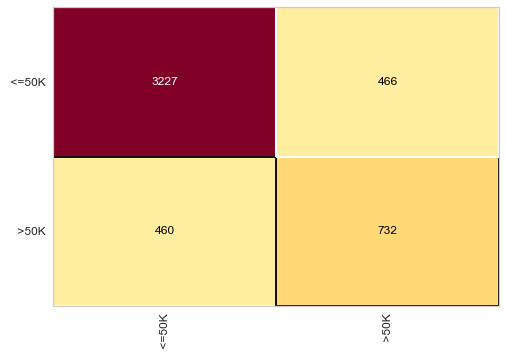

In [12]:
# Matriz de confusao (yellowbricks)
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [13]:
# Relatorio de classificacao
from sklearn.metrics import classification_report
print(classification_report(y_census_teste, prev_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



In [ ]:
# v) Arvore de decisao

In [14]:
arvore_census.classes_

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
# from sklearn import tree
# import matplotlib.pyplot as plt

# previsores = ['income', 'age', 'loan']
# fig, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

# tree.plot_tree(arvore_census, feature_names=previsores, class_names=arvore_census.classes_, filled=True)
# fig.savefig('arvore_census.png')

# O codigo base eh esse, mas, neste caso, nao funcionou